# Project 6

## Problem Statement
Analyze the titanic dataset.(get from kaggle website)
it is dirty data need the data cleaning / data preprocessing.
what sorts of people were more likely to survive using passenger data 
i.e(name,age,gender,socio-economic class etc)

for that create ml model by using above data-columns to able to predict which people survived ?
for 0 - not survived & for 1 - survived
so here are only two opitions in outputs so used
## Binary-class classification 

In [4]:
# Data preprocessing

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [20]:
df = pd.read_csv("Titanic-Dataset.csv")

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
#split data
#select only releavant data columns needed for our model
x = df[['Pclass','Sex','Age']]
y = df.Survived

In [28]:
x.isnull().sum()

Pclass      0
Sex         0
Age       177
dtype: int64

In [36]:
import warnings 
warnings.filterwarnings("ignore")
x.Age.fillna(x.Age.mean(),inplace = True)

In [38]:
x.isnull().sum()

Pclass    0
Sex       0
Age       0
dtype: int64

In [39]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     891 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 21.0+ KB


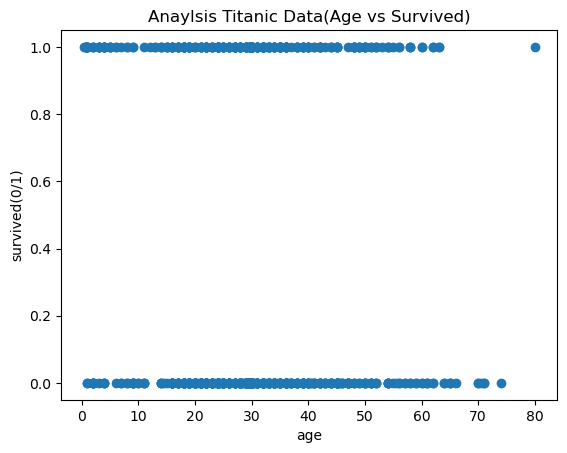

In [64]:
#now check which classification algo is used to create a model by data visualization
plt.title("Anaylsis Titanic Data(Age vs Survived)")
plt.scatter(x.Age,y)
plt.xlabel('age')
plt.ylabel('survived(0/1)')
plt.show()

gives the result to use logistic regression as get s-shaped curve.

before creatind model we need to convert string value into numeric value as m/c only understands numeric value.
for this used label encoding / one-hot encoding.

In [69]:
#labelencoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
gen = le.fit_transform(x.Sex)
x['Gender'] = gen
x.drop('Sex',axis = 1,inplace = True)

In [70]:
#create model
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y)

In [71]:
len(train_x),len(test_x)

(668, 223)

In [73]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x,y)


LogisticRegression()

In [74]:
model.score(test_x,test_y)

0.8251121076233184

In [77]:
(model.predict(test_x) == test_y).sum()

184

In [78]:
len(test_x)

223

so out of 223 only 184 values are get correctly predicted

In [79]:
x.head()

,Pclass,Age,Gender
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0
3,1,35.0,0
4,3,35.0,1


In [108]:
pc = int(input("Enter Pclass (1/2/3) : "))
age = int(input("Enter age of person : "))
gen = input("Enter gender of person(male/female) : ")
g = 0
if gen == 'male' : 
    g = 1
n = model.predict([[pc,age,g]])
print("********************************")
print("Person info")
print("pclass : ",pc)
print("age : ",age)
print("gender : ",gen)
print("*********************************")
print()
if n == 0:
    print('not survived')
else:
    print('survived')

Enter Pclass (1/2/3) :  2
Enter age of person :  21
Enter gender of person(male/female) :  male


********************************
Person info
pclass :  2
age :  21
gender :  male
*********************************

not survived
